# Getting Started with Kaggle

## Introduction to Kaggle

[Kaggle](https://www.kaggle.com/) is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.<br>

In this mission and the ones that follow, we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

* Approach a Kaggle competition
* Explore the competition data and learn about the competition topic
* Prepare data for machine learning
* Train a model
* Measure the accuracy of your model
* Prepare and make your first Kaggle submission.

This course presumes you have an understanding of Python and the pandas library. If you need to learn about these, we recommend our Python and pandas courses.<br>

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which passengers survived the [sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).<br>

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.<br>

Each Kaggle competition has two key data files that you will work with - a **training** set and a **testing** set.<br>

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, `Survival`.<br>

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

![https://s3.amazonaws.com/dq-content/185/kaggle_overview.svg](https://s3.amazonaws.com/dq-content/185/kaggle_overview.svg)

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.<br>

In this competition, the two files are named `test.csv` and `train.csv`. We'll start by using the pandas library to read both files and inspect their size.

* Use `pandas.read_csv()` to import `train.csv` and assign it to the variable `train`.
* Use `DataFrame.shape` to calculate the number of rows and columns in `train`, and assign the result to `train_shape`.
* Click Run to run your code, and use the variable inspector to view the four variables you just created.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train_shape = train.shape
test_shape = test.shape

## Exploring the Data

The files we read in the previous screen are available on [the data page for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a **data dictionary**, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

* `PassengerID` - A column added by Kaggle to identify each row and make submissions easier
* `Survived` - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* `Pclass` - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* `Sex` - The passenger's sex
* `Age` - The passenger's age in years
* `SibSp` - The number of siblings or spouses the passenger had aboard the Titanic
* `Parch` - The number of parents or children the passenger had aboard the Titanic
* `Ticket` - The passenger's ticket number
* `Fare` - The fare the passenger paid
* `Cabin` - The passenger's cabin number
* `Embarked` - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.<br>

The first 5 rows of the data is below:

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.<br>

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.<br>

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie [Titanic](https://en.wikipedia.org/wiki/Titanic_%281997_film%29) would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.<br>

This indicates that `Age`, `Sex`, and `PClass` may be good predictors of survival. We'll start by exploring `Sex` and `Pclass` by visualizing the data.<br>

Because the `Survived` column contains `0` if the passenger did not survive and `1` if they did, we can segment our data by sex and calculate the mean of this column. We can use `DataFrame.pivot_table()` to easily do this:

```python
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()
```

The resultant plot will look like this:

![https://s3.amazonaws.com/dq-content/185/sex_pivot_plot.png](https://s3.amazonaws.com/dq-content/185/sex_pivot_plot.png)

We can immediately see that females survived in much higher proportions than males did.<br>

Let's do the same with the `Pclass` column.


* Use `DataFrame.pivot_table()` to pivot the `train` dataframe:
  * Use `"Pclass"` for the `index` parameter.
  * Use `"Survived"` for the `values` parameter.
* Use `DataFrame.plot.bar()` to plot the pivot table.

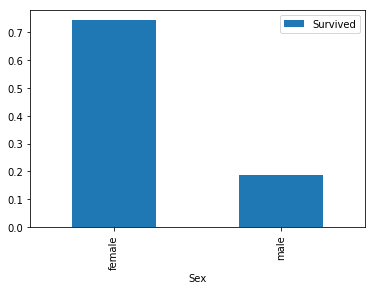

In [4]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

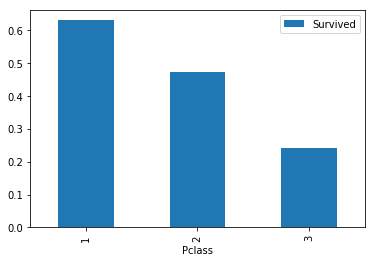

In [5]:
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")
pclass_pivot.plot.bar()
plt.show()

## Exploring and Converting the Age Column

The `Sex` and `PClass` columns are what we call **categorical** features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).<br>

Let's take a look at the `Age` column using `Series.describe()`. You can run this code for yourself in the console, if you wish.

```python
>>> train["Age"].describe()
​
    count    714.000000
    mean      29.699118
    std       14.526497
    min        0.420000
    25%       20.125000
    50%       28.000000
    75%       38.000000
    max       80.000000
    Name: Age, dtype: float64
```

The `Age` column contains numbers ranging from `0.42` to `80.0` (If you look at Kaggle's data page, it informs us that `Age` is fractional if the passenger is less than one). The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the `train` data set had earlier in this mission which indicates we have some missing values.<br>

All of this means that the `Age` column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:

```python
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()
```

The resultant plot will look like this:

![https://s3.amazonaws.com/dq-content/185/survived_age_hist.png](https://s3.amazonaws.com/dq-content/185/survived_age_hist.png)

The relationship here is not simple, but we can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars.<br>

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the [`pandas.cut()` function ](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)to help us out.<br>

The [`pandas.cut()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) has two required parameters - the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of `labels` for the resultant bins. This will make it easier for us to understand our results.<br>

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the `train` data, we also need to make to the `test` data, otherwise we will be unable to use our model to make predictions for our submissions. Secondly, we need to remember to handle the missing values we observed above.<br>

In the example below, we create a function that:

* uses the [`pandas.fillna()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.fillna.html) to fill all of the missing values with `-0.5`
* cuts the `Age` column into three segments: `Missing`, `Child`, and `Adult` using `pandas.cut()`.

We then use that function on both the `train` and `test` dataframes.

```python
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
```

The diagram below shows how the function converts the data:

![https://s3.amazonaws.com/dq-content/185/cut.svg](https://s3.amazonaws.com/dq-content/185/cut.svg)

Note that the `cut_points` list has one more element than the `label_names` list, since it needs to define the upper boundary for the last segment.

* Create the `cut_points` and `label_names` lists to split the `Age` column into six categories:
  * `Missing`, from `-1` to `0`
  * `Infant`, from `0` to `5`
  * `Child`, from `5` to `12`
  * `Teenager`, from `12` to `18`
  * `Young Adult`, from `18` to `35`
  * `Adult`, from `35` to `60`
  * `Senior`, from `60` to `100`
* Apply the `process_age()` function on the `train` dataframe, assigning the result to `train`.
* Apply the `process_age()` function on the `test` dataframe, assigning the result to `test`.
* Use `DataFrame.pivot_table()` to pivot the `train` dataframe by the `Age_categories` column.
* Use `DataFrame.plot.bar()` to plot the pivot table.

In [8]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager",
              "Young Adult", "Adult", "Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

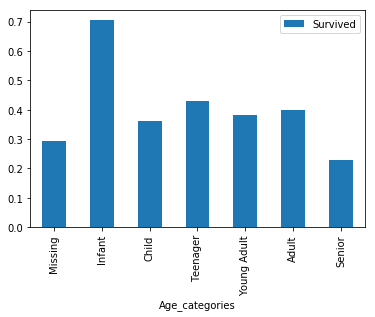

In [10]:
age_categories_pivot = train.pivot_table(index="Age_categories", values="Survived")
age_categories_pivot.plot.bar()
plt.show()

## Preparing our Data for Machine Learning

